# Install required packages

In [128]:
pip install -r requirements.txt

ERROR: Cannot uninstall 'entrypoints'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.



  Using cached entrypoints-0.4-py3-none-any.whl (5.3 kB)
  Using cached executing-1.2.0-py2.py3-none-any.whl (24 kB)
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
  Using cached huggingface_hub-0.11.1-py3-none-any.whl (182 kB)
  Using cached ipykernel-6.20.1-py3-none-any.whl (149 kB)
  Using cached ipython-8.8.0-py3-none-any.whl (775 kB)
  Using cached jedi-0.18.2-py2.py3-none-any.whl (1.6 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached jupyter_client-7.4.8-py3-none-any.whl (133 kB)
  Using cached jupyter_core-5.1.3-py3-none-any.whl (93 kB)
  Using cached kiwisolver-1.4.4-cp38-cp38-win_amd64.whl (55 kB)
  Using cached matplotlib-3.6.3-cp38-cp38-win_amd64.whl (7.2 MB)
  Using cached matplotlib_inline-0.1.6-py3-none-any.whl (9.4 kB)
  Using cached nest_asyncio-1.5.6-py3-none-any.whl (5.2 kB)
  Using cached numpy-1.24.1-cp38-cp38-win_amd64.whl (14.9 MB)
Processing c:\users\user\appdata\local\pip\cache\wheels\2f\9c\55\95d3609ccfc463eeffb96d50c756f1f189

In [129]:
pip install tiktoken


  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached pytz-2022.7.1-py2.py3-none-any.whl (499 kB)
  Using cached PyYAML-6.0-cp38-cp38-win_amd64.whl (155 kB)
  Using cached pyzmq-24.0.1-cp38-cp38-win_amd64.whl (998 kB)
  Using cached regex-2022.10.31-cp38-cp38-win_amd64.whl (267 kB)
  Using cached requests-2.28.1-py3-none-any.whl (62 kB)
  Using cached scikit_learn-1.2.0-cp38-cp38-win_amd64.whl (8.2 MB)
  Using cached scipy-1.10.0-cp38-cp38-win_amd64.whl (42.2 MB)
  Using cached stack_data-0.6.2-py3-none-any.whl (24 kB)
  Using cached tenacity-8.1.0-py3-none-any.whl (23 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached tiktoken-0.1.2-cp38-cp38-win_amd64.whl (575 kB)
  Using cached tokenizers-0.13.2-cp38-cp38-win_amd64.whl (3.3 MB)
  Using cached tornado-6.2-cp37-abi3-win_amd64.whl (425 kB)
  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)
  Using cached transformers-4.25.1-py3-none-any.whl (5.8 MB)
  Using cached yarg-0.1.9-py2.py3-no

In [130]:
pip install openai

Note: you may need to restart the kernel to use updated packages.


In [131]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [132]:
pip install --upgrade numpy --user

Requirement already up-to-date: numpy in c:\users\user\anaconda3\lib\site-packages (1.24.4)
Note: you may need to restart the kernel to use updated packages.


In [133]:
pip install openai[embeddings] --user

In [134]:
#import libraries
import requests
import re
import urllib.request
from bs4 import BeautifulSoup
from collections import deque
from html.parser import HTMLParser
from urllib.parse import urlparse
import os
import pandas as pd
import tiktoken
import openai
import numpy as np
from openai.embeddings_utils import distances_from_embeddings

# Setting up a web crawler

In [135]:
# import requests
# import re
# import urllib.request
# from bs4 import BeautifulSoup
# from collections import deque
# from html.parser import HTMLParser
# from urllib.parse import urlparse
# import os

# Regex pattern to match a URL
HTTP_URL_PATTERN = r'^http[s]*://.+'

domain = "www.sheneller.com" # <- domain to be crawled
full_url = "https://www.sheneller.com/post/the-traditional-sri-lankan-wellness-village-experience-ulpotha-retreat" # <- domain to be crawled with https or http

# Create a class to parse the HTML and get the hyperlinks
class HyperlinkParser(HTMLParser):
    def __init__(self):
        super().__init__()
        # Create a list to store the hyperlinks
        self.hyperlinks = []

    # Override the HTMLParser's handle_starttag method to get the hyperlinks
    def handle_starttag(self, tag, attrs):
        attrs = dict(attrs)

        # If the tag is an anchor tag and it has an href attribute, add the href attribute to the list of hyperlinks
        if tag == "a" and "href" in attrs:
            self.hyperlinks.append(attrs["href"])

In [136]:
# Function to get the hyperlinks from a URL
def get_hyperlinks(url):
    
    # Try to open the URL and read the HTML
    try:
        # Open the URL and read the HTML
        with urllib.request.urlopen(url) as response:

            # If the response is not HTML, return an empty list
            if not response.info().get('Content-Type').startswith("text/html"):
                return []
            
            # Decode the HTML
            html = response.read().decode('utf-8')
    except Exception as e:
        print(e)
        return []

    # Create the HTML Parser and then Parse the HTML to get hyperlinks
    parser = HyperlinkParser()
    parser.feed(html)

    return parser.hyperlinks

In [137]:
# Function to get the hyperlinks from a URL that are within the same domain
def get_domain_hyperlinks(local_domain, url):
    clean_links = []
    for link in set(get_hyperlinks(url)):
        clean_link = None

        # If the link is a URL, check if it is within the same domain
        if re.search(HTTP_URL_PATTERN, link):
            # Parse the URL and check if the domain is the same
            url_obj = urlparse(link)
            if url_obj.netloc == local_domain:
                clean_link = link

        # If the link is not a URL, check if it is a relative link
        else:
            if link.startswith("/"):
                link = link[1:]
            elif link.startswith("#") or link.startswith("mailto:"):
                continue
            clean_link = "https://" + local_domain + "/" + link

        if clean_link is not None:
            if clean_link.endswith("/"):
                clean_link = clean_link[:-1]
            clean_links.append(clean_link)

    # Return the list of hyperlinks that are within the same domain
    return list(set(clean_links))

In [138]:
def crawl(url):
    # Parse the URL and get the domain
    local_domain = urlparse(url).netloc

    # Create a queue to store the URLs to crawl
    queue = deque([url])

    # Create a set to store the URLs that have already been seen (no duplicates)
    seen = set([url])

    # Create a directory to store the text files
    if not os.path.exists("text/"):
            os.mkdir("text/")

    if not os.path.exists("text/"+local_domain+"/"):
            os.mkdir("text/" + local_domain + "/")

    # Create a directory to store the csv files
    if not os.path.exists("processed"):
            os.mkdir("processed")

    # While the queue is not empty, continue crawling
    while queue:

        # Get the next URL from the queue
        url = queue.pop()
        print(url) # for debugging and to see the progress

        # Save text from the url to a <url>.txt file
        with open('text/'+local_domain+'/'+url[8:].replace("/", "_") + ".txt", "w", encoding="UTF-8") as f:

            # Get the text from the URL using BeautifulSoup
            soup = BeautifulSoup(requests.get(url).text, "html.parser")

            # Get the text but remove the tags
            text = soup.get_text()

            # If the crawler gets to a page that requires JavaScript, it will stop the crawl
            if ("You need to enable JavaScript to run this app." in text):
                print("Unable to parse page " + url + " due to JavaScript being required")
            
            # Otherwise, write the text to the file in the text directory
            f.write(text)

        # Get the hyperlinks from the URL and add them to the queue
#         for link in get_domain_hyperlinks(local_domain, url):
#             if link not in seen:
#                 queue.append(link)
#                 seen.add(link)

crawl(full_url)

https://www.sheneller.com/post/the-traditional-sri-lankan-wellness-village-experience-ulpotha-retreat


# Building an embeddings index

In [139]:
#Remove blank empty lines
def remove_newlines(serie):
    serie = serie.str.replace('\n', ' ')
    serie = serie.str.replace('\\n', ' ')
    serie = serie.str.replace('  ', ' ')
    serie = serie.str.replace('  ', ' ')
    return serie

In [140]:
# import pandas as pd

# Create a list to store the text files
texts=[]

# Get all the text files in the text directory
for file in os.listdir("text/" + domain + "/"):

    # Open the file and read the text
    with open("text/" + domain + "/" + file, "r", encoding="UTF-8") as f:
        text = f.read()

        # Omit the first 11 lines and the last 4 lines, then replace -, _, and #update with spaces.
        texts.append((file[11:-4].replace('-',' ').replace('_', ' ').replace('#update',''), text))

# Create a dataframe from the list of texts
df = pd.DataFrame(texts, columns = ['fname', 'text'])

# Set the text column to be the raw text with the newlines removed
df['text'] = df.fname + ". " + remove_newlines(df.text)
df.to_csv('processed/scraped.csv')
df.head()

,fname,text
0,er.com,"er.com. google.com, pub-30673..."
1,er.com beauty,"er.com beauty. google.com, pu..."
2,er.com blog,"er.com blog. google.com, pub-..."
3,er.com blog categories bali on a budget,er.com blog categories bali on a budget. ...
4,er.com blog categories this is sri lanka,er.com blog categories this is sri lanka. ...


In [141]:
# pip install tiktoken

<AxesSubplot:>

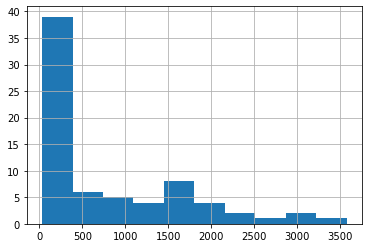

In [142]:
# import tiktoken

# Load the cl100k_base tokenizer which is designed to work with the ada-002 model
tokenizer = tiktoken.get_encoding("cl100k_base")

df = pd.read_csv('processed/scraped.csv', index_col=0)
df.columns = ['title', 'text']

# Tokenize the text and save the number of tokens to a new column
df['n_tokens'] = df.text.apply(lambda x: len(tokenizer.encode(x)))

# Visualize the distribution of the number of tokens per row using a histogram
df.n_tokens.hist()

In [143]:
max_tokens = 500

# Function to split the text into chunks of a maximum number of tokens
def split_into_many(text, max_tokens = max_tokens):

    # Split the text into sentences
    sentences = text.split('. ')

    # Get the number of tokens for each sentence
    n_tokens = [len(tokenizer.encode(" " + sentence)) for sentence in sentences]
    
    chunks = []
    tokens_so_far = 0
    chunk = []

    # Loop through the sentences and tokens joined together in a tuple
    for sentence, token in zip(sentences, n_tokens):

        # If the number of tokens so far plus the number of tokens in the current sentence is greater 
        # than the max number of tokens, then add the chunk to the list of chunks and reset
        # the chunk and tokens so far
        if tokens_so_far + token > max_tokens:
            chunks.append(". ".join(chunk) + ".")
            chunk = []
            tokens_so_far = 0

        # If the number of tokens in the current sentence is greater than the max number of 
        # tokens, go to the next sentence
        if token > max_tokens:
            continue

        # Otherwise, add the sentence to the chunk and add the number of tokens to the total
        chunk.append(sentence)
        tokens_so_far += token + 1

    return chunks
    

shortened = []

# Loop through the dataframe
for row in df.iterrows():

    # If the text is None, go to the next row
    if row[1]['text'] is None:
        continue

    # If the number of tokens is greater than the max number of tokens, split the text into chunks
    if row[1]['n_tokens'] > max_tokens:
        shortened += split_into_many(row[1]['text'])
    
    # Otherwise, add the text to the list of shortened texts
    else:
        shortened.append( row[1]['text'] )

<AxesSubplot:>

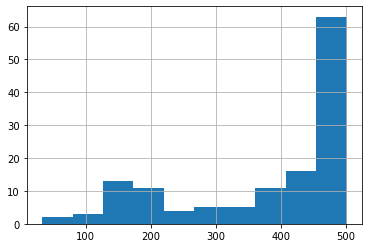

In [144]:
df = pd.DataFrame(shortened, columns = ['text'])
df['n_tokens'] = df.text.apply(lambda x: len(tokenizer.encode(x)))
df.n_tokens.hist()

In [145]:
# pip install openai

In [146]:
# import openai
openai.api_key = "<API KEY>"

#create embeddings
df['embeddings'] = df.text.apply(lambda x: openai.Embedding.create(input=x, engine='text-embedding-ada-002')['data'][0]['embedding'])

df.to_csv('processed/embeddings.csv')
df.head()

,text,n_tokens,embeddings
0,"er.com. google.com, pub-30673...",304,"[-0.0026199347339570522, 0.007963530719280243,..."
1,"er.com beauty. google.com, pu...",121,"[0.00032139004906639457, 0.013038176111876965,..."
2,"er.com blog. google.com, pub-...",186,"[0.018874598667025566, 0.02605769969522953, -0..."
3,er.com blog categories bali on a budget. ...,231,"[0.011494230479001999, 0.009765672497451305, 0..."
4,er.com blog categories this is sri lanka. ...,322,"[0.018257930874824524, 0.020727021619677544, -..."


In [147]:
# pip install plotly

In [148]:
# pip install --upgrade numpy --user

# Building Q&A system with embeddings

In [149]:
# import numpy as np
# from openai.embeddings_utils import distances_from_embeddings

#Turn embeddings into a Numpy array
df=pd.read_csv('processed/embeddings.csv', index_col=0)
df['embeddings'] = df['embeddings'].apply(eval).apply(np.array)

df.head()

,text,n_tokens,embeddings
0,"er.com. google.com, pub-30673...",304,"[-0.0026199347339570522, 0.007963530719280243,..."
1,"er.com beauty. google.com, pu...",121,"[0.00032139004906639457, 0.013038176111876965,..."
2,"er.com blog. google.com, pub-...",186,"[0.018874598667025566, 0.02605769969522953, -0..."
3,er.com blog categories bali on a budget. ...,231,"[0.011494230479001999, 0.009765672497451305, 0..."
4,er.com blog categories this is sri lanka. ...,322,"[0.018257930874824524, 0.020727021619677544, -..."


In [150]:
# pip install openai[embeddings] --user

In [151]:
# pip install --upgrade openai

In [152]:
# from openai.embeddings_utils import distances_from_embeddings

In [153]:
def create_context(
    question, df, max_len=1800, size="ada"
):
    """
    Create a context for a question by finding the most similar context from the dataframe
    """

    # Get the embeddings for the question
    q_embeddings = openai.Embedding.create(input=question, engine='text-embedding-ada-002')['data'][0]['embedding']

    # Get the distances from the embeddings
    df['distances'] = distances_from_embeddings(q_embeddings, df['embeddings'].values, distance_metric='cosine')


    returns = []
    cur_len = 0

    # Sort by distance and add the text to the context until the context is too long
    for i, row in df.sort_values('distances', ascending=True).iterrows():
        
        # Add the length of the text to the current length
        cur_len += row['n_tokens'] + 4
        
        # If the context is too long, break
        if cur_len > max_len:
            break
        
        # Else add it to the text that is being returned
        returns.append(row["text"])

    # Return the context
    return "\n\n###\n\n".join(returns)

In [155]:
def answer_question(
    df,
    model="text-davinci-003",
    question="Am I allowed to publish model outputs to Twitter, without a human review?",
    max_len=1800,
    size="ada",
    debug=False,
    max_tokens=150,
    stop_sequence=None
):
    """
    Answer a question based on the most similar context from the dataframe texts
    """
    context = create_context(
        question,
        df,
        max_len=max_len,
        size=size,
    )
    # If debug, print the raw model response
    if debug:
        print("Context:\n" + context)
        print("\n\n")

    try:
        # Create a completions using the question and context
        response = openai.Completion.create(
            prompt=f"Answer the question based on the context below, and if the question can't be answered based on the context, say \"I don't know\"\n\nContext: {context}\n\n---\n\nQuestion: {question}\nAnswer:",
            temperature=0,
            max_tokens=max_tokens,
            top_p=1,
            frequency_penalty=0,
            presence_penalty=0,
            stop=stop_sequence,
            model=model,
        )
        return response["choices"][0]["text"].strip()
    except Exception as e:
        print(e)
        return ""

In [156]:
answer_question(df, question="What day is it?")

"I don't know."

In [157]:
answer_question(df, question="What is Ulpotha retreat?")

"Ulpotha retreat is a private secret hideaway located in the north-central region of Sri Lanka, within the Cultural Triangle. It offers two-week yoga retreats with some of the world's best yoga instructors, as well as a range of massages, therapies, and Ayurvedic treatments."

In [158]:
answer_question(df, question="What are the packages available to stay at Ulpotha?")

"I don't know."

In [159]:
answer_question(df, question="Hi!", debug=False)

'Hi!'

In [160]:
answer_question(df, question="Can you tell me what this website is about?", debug=False)

'This website is about travel guides, content creation, modelling portfolio, and blog posts about Sri Lanka.'

In [161]:
answer_question(df, question="Can you describe the content of the video included in the website?", debug=False)

"I don't know."

In [162]:
answer_question(df, question="Hi! How are you?", debug=False)

"I don't know."